# Clase 2: About Python


## ¿Qué es Python? 

Python es un lenguaje de `propósito general` creado en 1989 por [Guido van Rossum](https://en.wikipedia.org/wiki/Guido_van_Rossum). 

La primera versión Python 0.9.0. fue lanzada en 1991, la versión Python 2.0 en el 2000. La versión 3.0 fue publicada en el 2008. 

Python es gratuito y de código abierto. El desarrollo se encuentra coordinado por [Python Software Fundation](https://www.python.org/psf-landing/)

Actualmente es uno de los lenguajes más populares. 

## ¿Por qué es tan popular? 
La popularidad de Python con respecto a otros lenguajes, por ejemplo a Matlab, ha incrementado sostenidamente. 

```{figure} popularity.png
---
height: 400px
name: popularity-fig
---
% Python Stack Overflow questions.
```

La popularidad de Python viene de la mano con la popularidad de librerías como [pandas](https://pandas.pydata.org/)


```{figure} popularity_pandas.png
---
height: 400px
name: popularity_pandas-fig
---
% Pandas Stack Overflow questions.
```

- Es fácil de ocupar.
- Es gratuito.
- Gran comunidad, ejm: [stackoverflow](https://es.stackoverflow.com/questions/tagged/python).
- Grandes desarrolladores utilizan python: Google, Facebook, Amazon. 
- Gran número de librerías: para análisis de datos, inteligencia artificial, gráficos, métodos numéricos, etc. 
- Eficiente, rápido, limpio, flexible. 
- Se puede integrar con otros lenguajes como R o Julia. 


## Algunos ejemplos
### Manejo de bases

In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv("/home/felix/Dropbox/ayudantia1.csv", sep="\t")
df2= df.rename(columns = {'Tasa de desempleo': 'desempleo', 'PIB a precios corrientes': 'PIB' }, inplace = False)
df2[20:30]

,Periodo,desempleo,PIB
20,01/03/15,6.23,39179.71
21,01/06/15,6.67,39535.45
22,01/09/15,6.54,38263.48
23,01/12/15,5.87,42574.71
24,01/03/16,6.49,41953.61
25,01/06/16,7.02,41447.91
26,01/09/16,7.03,40805.27
27,01/12/16,6.20,45330.60
28,01/03/17,7.04,43602.20
29,01/06/17,7.31,44040.88


### Gráficos

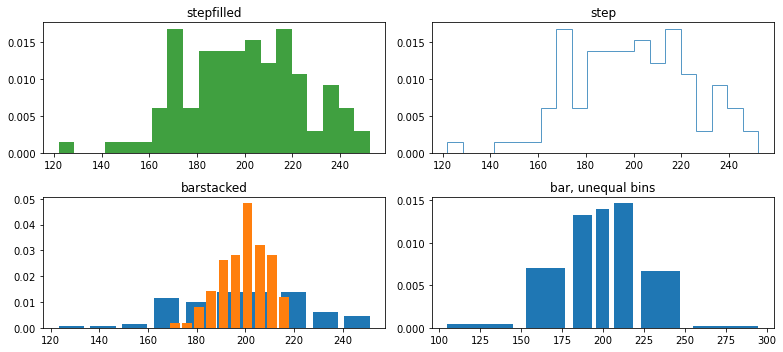

In [23]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

mu_x = 200
sigma_x = 25
x = np.random.normal(mu_x, sigma_x, size=100)

mu_w = 200
sigma_w = 10
w = np.random.normal(mu_w, sigma_w, size=100)

fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0, 0].hist(x, 20, density=True, histtype='stepfilled', facecolor='g',
               alpha=0.75)
axs[0, 0].set_title('stepfilled')

axs[0, 1].hist(x, 20, density=True, histtype='step', facecolor='g',
               alpha=0.75)
axs[0, 1].set_title('step')

axs[1, 0].hist(x, density=True, histtype='barstacked', rwidth=0.8)
axs[1, 0].hist(w, density=True, histtype='barstacked', rwidth=0.8)
axs[1, 0].set_title('barstacked')

# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
axs[1, 1].hist(x, bins, density=True, histtype='bar', rwidth=0.8)
axs[1, 1].set_title('bar, unequal bins')

fig.tight_layout()
plt.show()

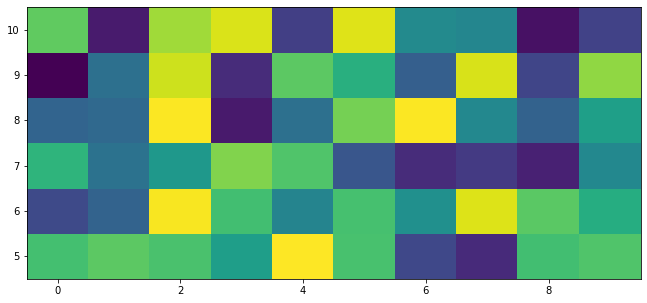

In [24]:
np.random.seed(19680801)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z)


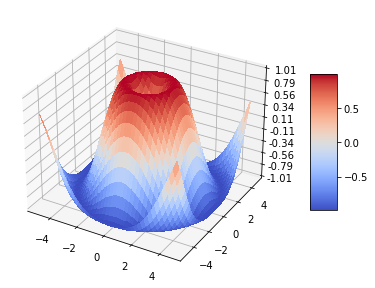

In [27]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Regresiones

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          2.83e-239
Time:                        20:53:44   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

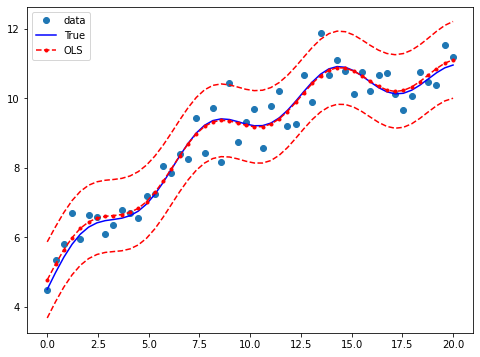

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)


X = sm.add_constant(X)
y = np.dot(X, beta) + e

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())



nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)
res = sm.OLS(y, X).fit()

prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

### Ejemplos covid simulation
https://github.com/paulvangentcom/python_corona_simulation

### Ejemplos deepfake
https://colab.research.google.com/github/AliaksandrSiarohin/first-order-model/blob/master/demo.ipynb#scrollTo=Oxi6-riLOgnm

## Anaconda

[Anaconda](https://www.anaconda.com/products/individual) es "una distribución libre y abierta de los lenguajes Python y R".  

Tiene soporte para Windows, Mac o Linux. 

```{figure} Anaconda1.png
---
height: 400px
name: anaconda1-fig
---
% Anaconda
```

```{figure} anaconda.png
---
height: 400px
name: anaconda-fig
---
% Pandas Stack Overflow questions.
```


```{figure} anaconda3.png
---
height: 400px
name: anaconda3-fig
---
% Pandas Stack Overflow questions.
```

Ejemplo de cómo instalar https://www.youtube.com/watch?v=52h3r_lROGY&t=541s


#### Para Windows
```{figure} anaconda4.png
---
height: 400px
name: anaconda4-fig
---
% Pandas Stack Overflow questions.
```

```{figure} anaconda5.png
---
height: 400px
name: anaconda5-fig
---
% Pandas Stack Overflow questions.
```

```{figure} anaconda6.png
---
height: 400px
name: anaconda6-fig
---
% Pandas Stack Overflow questions.
```
#### Para Mac
Una vez instaldo Anaconda, abrir una `terminal`. 
En la terminal, escribir `python`. 

Si python está correctamente instalado les va a mostrar la versión junto a otra información. Por ejemplo

```{figure} anaconda7.png
---
height: 200px
width: 400px
name: anaconda7-fig
---
% Pandas Stack Overflow questions.
```


```{figure} jupyter1.png
---
height: 400px
name: jupyter1-fig
---
% Pandas Stack Overflow questions.
```

## Tareas
1. Chequear si Python está instalado. 
2. Usar Jupyter para abrir el archivo de **intro.ipynb**
2. Instalar `pandas` usando conda. 
3. Instalar `numpy` usando pip. 
4. Responder el siguiente formulario: https://forms.gle/hBx1xD5fLBK5NF8QA
